<a href="https://colab.research.google.com/github/faisal-iut/household-pulse/blob/master/education_clustering_on_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.8MB/s 
     |████████████████████████████████| 8.7MB 39.5MB/s 
     |████████████████████████████████| 2.1MB 52.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill
import pickle
import re
import itertools
# from statsmodels.tsa.arima_model import ARIMA
# import statsmodels
# print(statsmodels.__version__)
# import pmdarima as pm
# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [ ]:
from google.colab import drive

In [ ]:
edu = {}
path =  '/content/drive/My Drive/Colab Notebooks/education data/'
w_s = 1
w_e = 10
t_s = 1
t_e = 5

In [ ]:
##Loading data
edu_3_ffile =  path+'edu_3_processed_to_f.pickle'
with open(edu_3_ffile, 'rb') as handle:
    forecast = pickle.load(handle)

forecast[forecast < 0] = 0
forecast = forecast.drop('US', axis=0)
forecast.head(10)

Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes  \
AL 0.6963                                                                                                                    
AK 0.7558                                                                                                                    
AZ 0.6520                                                                                                                    
AR 0.5722                                                                                                                    
CA 0.7436                                                                                                                    
CO 0.7933                                                                                                                    
CT 0.7578                                                                                                                    
DE 0.7131                                                                                                                    
DC 0.6362                                                                                                                    
FL 0.6978                                                                                                                    

    Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes  \
AL 0.2138                                                                                                                     
AK 0.1282                                                                                                                     
AZ 0.1734                                                                                                                     
AR 0.1711                                                                                                                     
CA 0.1628                                                                                                                     
CO 0.1119                                                                                                                     
CT 0.1858                                                                                                                     
DE 0.1939                                                                                                                     
DC 0.2277                                                                                                                     
FL 0.1794                                                                                                                     

    Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes  \
AL 0.0521                                                                                                                       
AK 0.0707                                                                                                                       
AZ 0.1178                                                                                                                       
AR 0.0811                                                                                                                       
CA 0.0654                                                                                                                       
CO 0.0315                                                                                                                       
CT 0.0537                                                                                                                       
DE 0.0450                                                                                                                       
DC 0.0814                                                 

In [ ]:
aa = "Hispanic origin and Race_Two or more races + Other races, not Hispanic ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes"


In [ ]:
forecast.loc['DC',aa]

DC   1.0000
DC   0.1398
DC   0.6396
DC   0.9533
DC   0.8100
DC   1.0000
DC   1.0000
DC   0.7557
DC   0.3817
Name: Hispanic origin and Race_Two or more races + Other races, not Hispanic ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes, dtype: float64

In [ ]:
forecast = forecast.groupby(by = forecast.index,as_index=True).mean()

In [ ]:
forecast.head()

Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes  \
AK                 0.6300                                                                                                                    
AL                 0.6428                                                                                                                    
AR                 0.5707                                                                                                                    
AZ                 0.6128                                                                                                                    
Atlanta_Metro_Area 0.6962                                                                                                                    

                    Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes  \
AK                 0.2001                                                                                                                     
AL                 0.2011                                                                                                                     
AR                 0.2317                                                                                                                     
AZ                 0.1983                                                                                                                     
Atlanta_Metro_Area 0.1852                                                                                                                     

                    Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes  \
AK                 0.1035                                                                                                                       
AL                 0.0982                                                                                                                       
AR                 0.1074                                                                                                                       
AZ                 0.1083                                                                                                                       
Atlanta_Metro_Area 0.0886                                                                                                                       

                    Total ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes  \
AK                 0.0265                                                                                                                    
AL                 0.0360                                                                                                                    
AR                 0.0604                                                                                                                    
AZ                 0.0527                                                                                                                    
Atlanta_Metro_Area 0.0146                                                                                                                    

                    Total ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes  \
AK                 0.0399                                                                                                                   
AL                 0.0218                                                                                                                   
AR                 0.0297                                                                                                                   
AZ                 0

In [ ]:
risked = ['AL',
 'AK',
 'AZ',
 'AR',
 'DE',
 'HI',
 'KS',
 'LA',
 'ME',
 'MT',
 'NE',
 'NH',
 'ND',
 'OK',
 'SD',
 'WV',
 'WY',
 'Phoenix_Metro_Area',
 'Detroit_Metro_Area',
 'MS', 'PA', 'Philadelphia_Metro_Area','VT']

In [ ]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
us_state_abbrev_r = {us_state_abbrev[k]:k for k in us_state_abbrev}
forecast["Location"] = forecast.index
forecast["Location_abv"] = forecast.index
a = list(forecast.index)
a_result = {}
for elem in a:
  if elem in us_state_abbrev_r.keys():
    a_result[elem] = us_state_abbrev_r[elem]
  if len(elem)>2:
    a_result[elem] = elem

forecast["Location"] = forecast.apply(lambda x: a_result[x["Location"]],axis=1)

In [ ]:
forecast.head(10)

Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes  \
AK                 0.6300                                                                                                                    
AL                 0.6428                                                                                                                    
AR                 0.5707                                                                                                                    
AZ                 0.6128                                                                                                                    
Atlanta_Metro_Area 0.6962                                                                                                                    
Boston_Metro_Area  0.7536                                                                                                                    
CA                 0.6718                                                                                                                    
CO                 0.7135                                                                                                                    
CT                 0.7789                                                                                                                    
Chicago_Metro_Area 0.7270                                                                                                                    

                    Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes  \
AK                 0.2001                                                                                                                     
AL                 0.2011                                                                                                                     
AR                 0.2317                                                                                                                     
AZ                 0.1983                                                                                                                     
Atlanta_Metro_Area 0.1852                                                                                                                     
Boston_Metro_Area  0.1492                                                                                                                     
CA                 0.2016                                                                                                                     
CO                 0.1931                                                                                                                     
CT                 0.1613                                                                                                                     
Chicago_Metro_Area 0.1816                                                                                                                     

                    Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes  \
AK                 0.1035                                                                                                                       
AL                 0.0982                                                                                                                       
AR                 0.1074                                                                                                                       
AZ                 0.1083                                                                                                                       
Atlanta_Metro_Area 0.0886                                                                                                                       
Boston_Metro_

In [ ]:
locs = forecast.Location_abv.str.len().sort_values().index
forecast = forecast.reindex(locs)
forecast = forecast.reset_index(drop=True)

In [ ]:
forecast["Accessibility"] = forecast.apply(lambda x: "Less access" if x["Location_abv"] in risked else "Usual access", axis =1)

In [ ]:
forecast.head(10)

Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes  \
0 0.6300                                                                                                                    
1 0.6841                                                                                                                    
2 0.6545                                                                                                                    
3 0.5898                                                                                                                    
4 0.7310                                                                                                                    
5 0.7231                                                                                                                    
6 0.6492                                                                                                                    
7 0.7648                                                                                                                    
8 0.7440                                                                                                                    
9 0.6099                                                                                                                    

   Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes  \
0 0.2001                                                                                                                     
1 0.1679                                                                                                                     
2 0.2254                                                                                                                     
3 0.2601                                                                                                                     
4 0.1668                                                                                                                     
5 0.1942                                                                                                                     
6 0.2330                                                                                                                     
7 0.1685                                                                                                                     
8 0.1586                                                                                                                     
9 0.1970                                                                                                                     

   Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes  \
0 0.1035                                                                                                                       
1 0.0964                                                                                                                       
2 0.0958                                                                                                                       
3 0.1144                                                                                                                       
4 0.0573                                                                                                                       
5 0.0574                                                                                                                       
6 0.0762                                                                                                                       
7 0.0357                                                                                                                       
8 0.0758                                                                                

In [ ]:
aa = "Hispanic origin and Race_Two or more races + Other races, not Hispanic ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes"
bb =  'Computer provided by… *_Someone in household or family or belongs to child ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes'


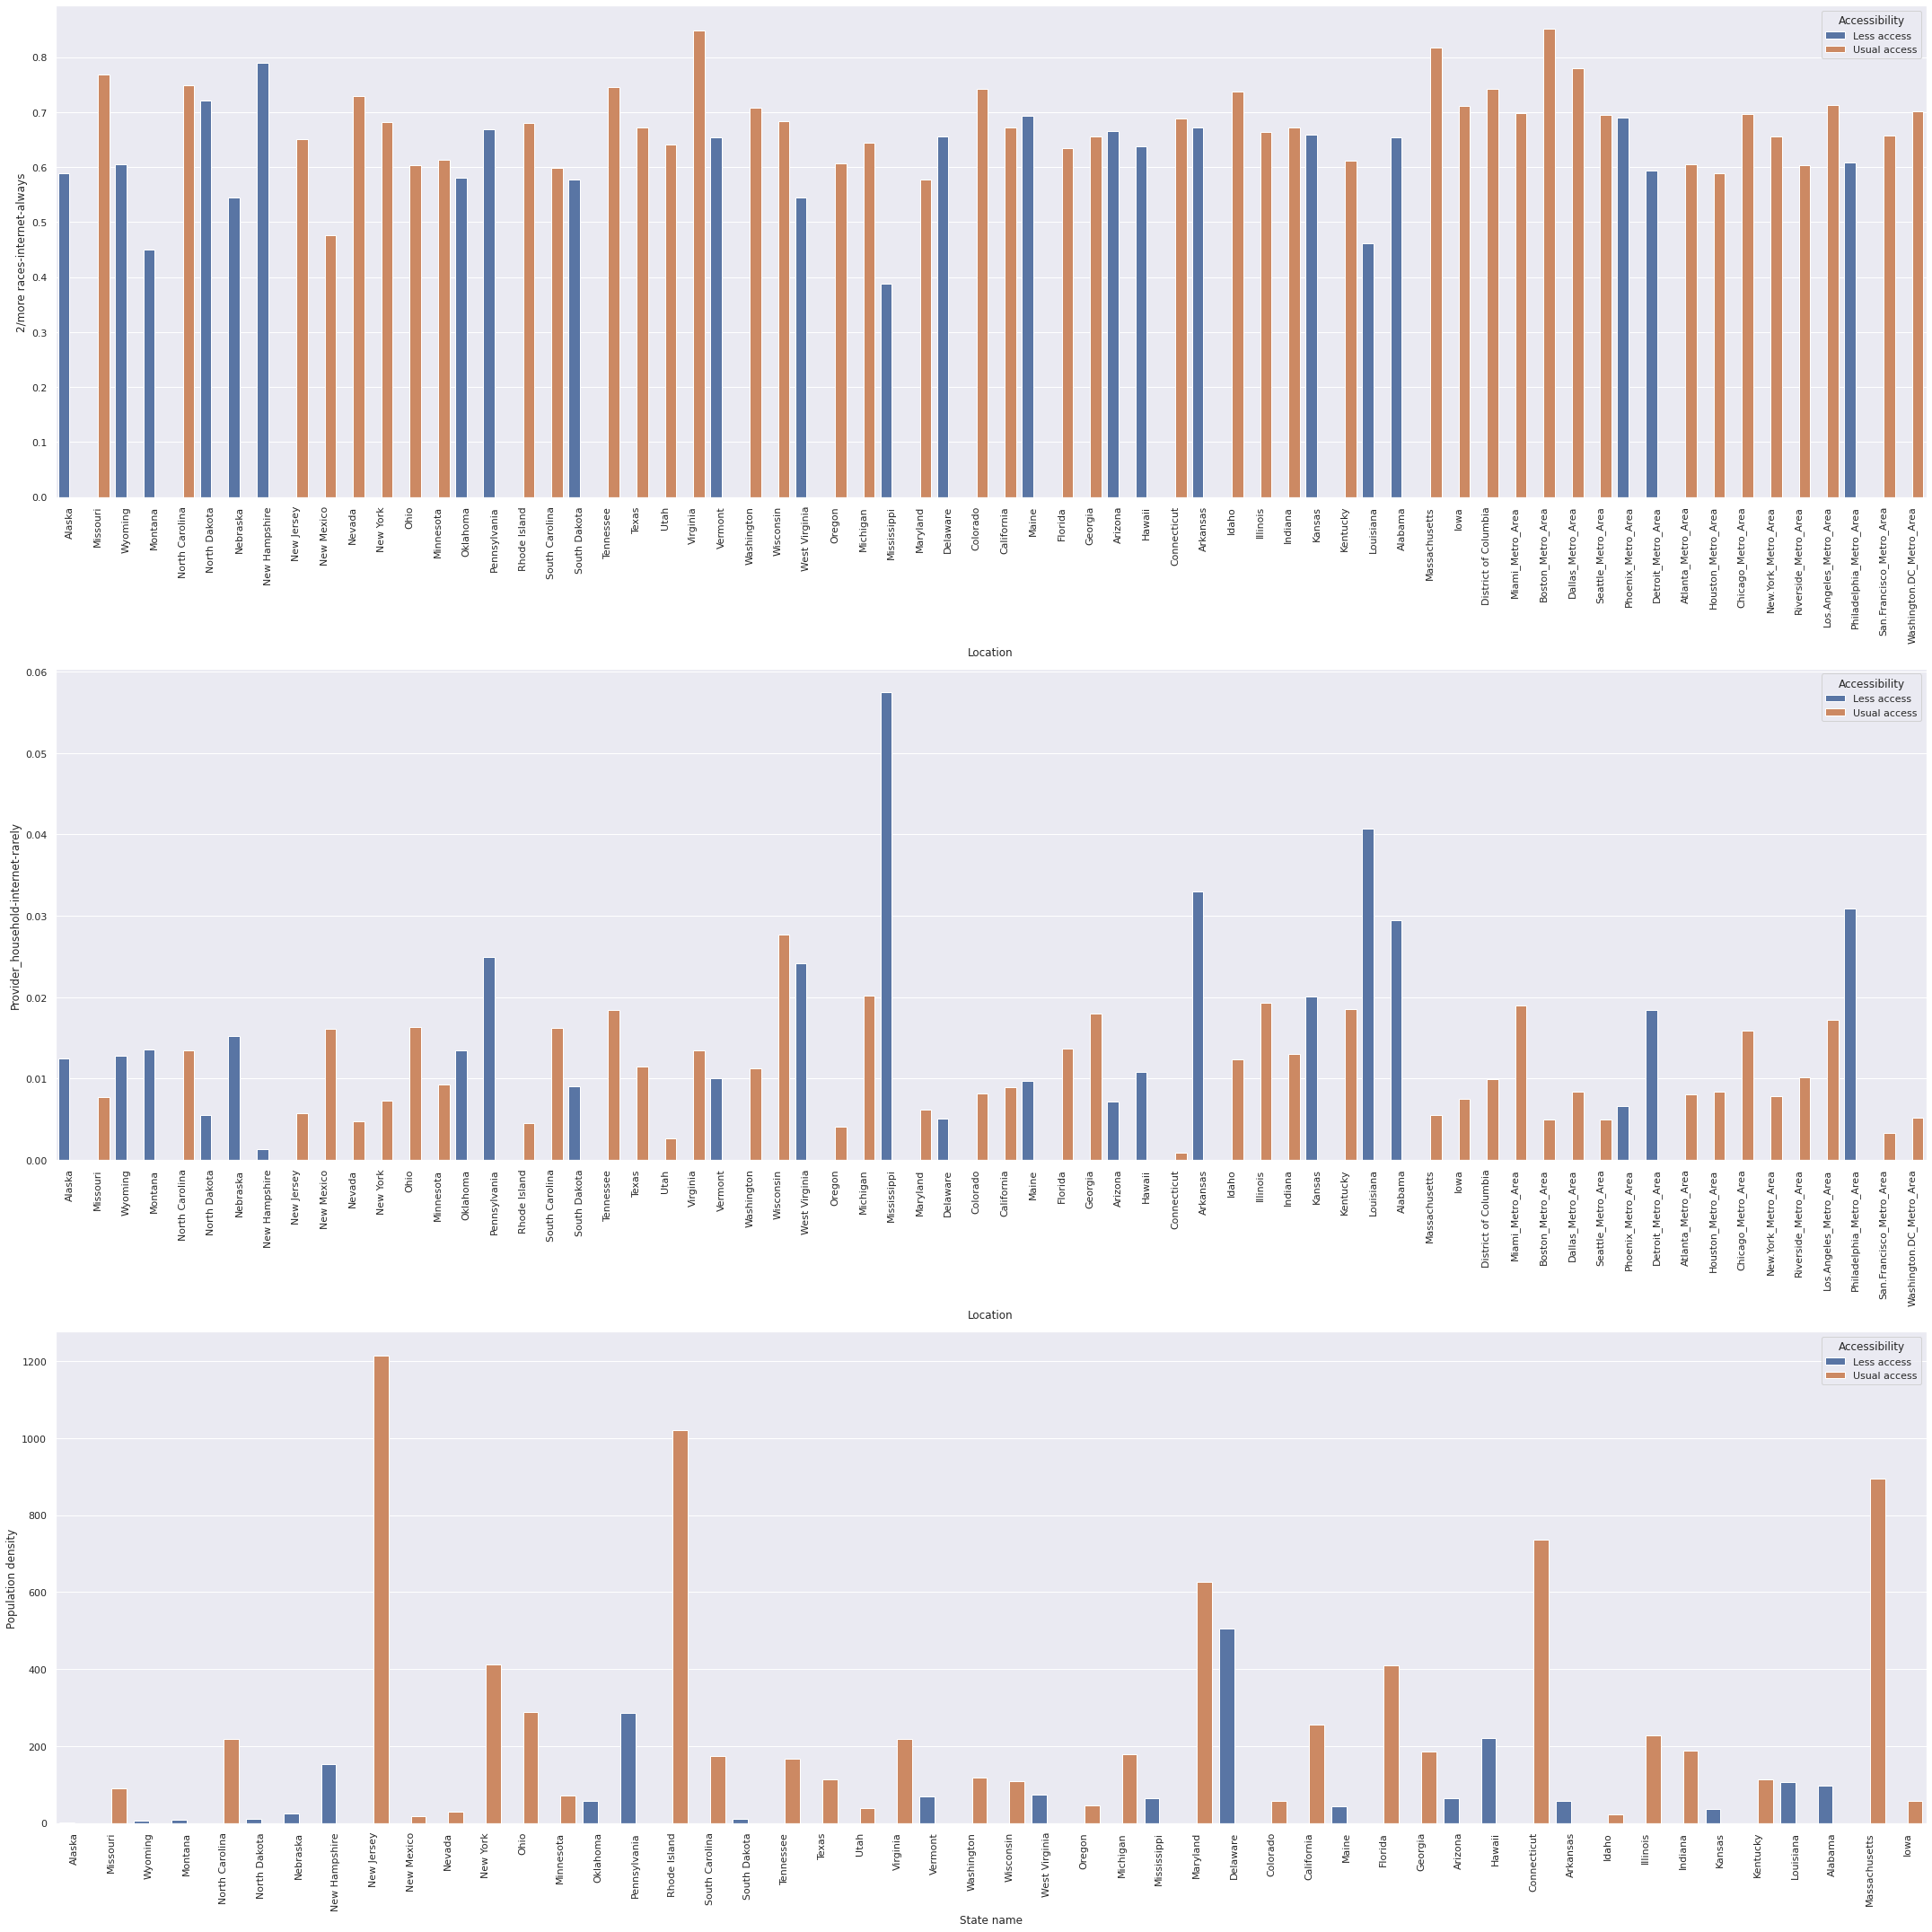

In [ ]:


fig, axes = plt.subplots(3,1, figsize=(30,30))
ax = axes[0]
sns.barplot(x="Location", y=aa, hue="Accessibility", data=forecast,ax=ax )
ax.set_ylabel("2/more races-internet-always")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = axes[1]
sns.barplot(x="Location", y=bb, hue="Accessibility", data=forecast,ax=ax )
ax.set_ylabel("Provider_household-internet-rarely")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = axes[2]
sns.barplot(x="Location", y="Density", hue="Accessibility", data=df_merge,ax=ax )
ax.set_ylabel("Population density")
ax.set_xlabel("State name")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_merge[df_merge["Location"]=="Alaska"]

NameError: ignored

In [ ]:
Accessibility = dict(zip(forecast.Location,forecast.Accessibility))

In [ ]:
Accessibility

{'Alabama': 'Less access',
 'Alaska': 'Less access',
 'Arizona': 'Less access',
 'Arkansas': 'Less access',
 'Atlanta_Metro_Area': 'Usual access',
 'Boston_Metro_Area': 'Usual access',
 'California': 'Usual access',
 'Chicago_Metro_Area': 'Usual access',
 'Colorado': 'Usual access',
 'Connecticut': 'Usual access',
 'Dallas_Metro_Area': 'Usual access',
 'Delaware': 'Less access',
 'Detroit_Metro_Area': 'Less access',
 'District of Columbia': 'Usual access',
 'Florida': 'Usual access',
 'Georgia': 'Usual access',
 'Hawaii': 'Less access',
 'Houston_Metro_Area': 'Usual access',
 'Idaho': 'Usual access',
 'Illinois': 'Usual access',
 'Indiana': 'Usual access',
 'Iowa': 'Usual access',
 'Kansas': 'Less access',
 'Kentucky': 'Usual access',
 'Los.Angeles_Metro_Area': 'Usual access',
 'Louisiana': 'Less access',
 'Maine': 'Less access',
 'Maryland': 'Usual access',
 'Massachusetts': 'Usual access',
 'Miami_Metro_Area': 'Usual access',
 'Michigan': 'Usual access',
 'Minnesota': 'Usual access',

In [ ]:
de = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/csvDataDensity.csv', index_col=0, thousands=',')

In [ ]:
de.head(10)

Density       Pop  LandArea
State                                       
Washington DC 11814.5410  720687    61      
New Jersey    1215.1985   8936570   7354    
Rhode Island  1021.4313   1056160   1034    
Massachusetts 894.4359    6976600   7800    
Connecticut   735.8695    3563080   4842    
Maryland      626.6735    6083120   9707    
Delaware      504.3073    982895    1949    
New York      412.5218    19440500  47126   
Florida       410.1259    21993000  53625   
Ohio          287.5040    11747700  40861

In [ ]:
de["Location"] = de.index

In [ ]:
set(forecast["Location"]).difference(de["Location"])

{'Atlanta_Metro_Area',
 'Boston_Metro_Area',
 'Chicago_Metro_Area',
 'Dallas_Metro_Area',
 'Detroit_Metro_Area',
 'District of Columbia',
 'Houston_Metro_Area',
 'Los.Angeles_Metro_Area',
 'Miami_Metro_Area',
 'New.York_Metro_Area',
 'Philadelphia_Metro_Area',
 'Phoenix_Metro_Area',
 'Riverside_Metro_Area',
 'San.Francisco_Metro_Area',
 'Seattle_Metro_Area',
 'Washington.DC_Metro_Area'}

In [ ]:
df_merge = pd.merge(forecast,de,on='Location',how='inner')

In [ ]:
df_merge.head()

Total ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes  \
0 0.6300                                                                                                                    
1 0.6841                                                                                                                    
2 0.6545                                                                                                                    
3 0.5898                                                                                                                    
4 0.7310                                                                                                                    

   Total ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes  \
0 0.2001                                                                                                                     
1 0.1679                                                                                                                     
2 0.2254                                                                                                                     
3 0.2601                                                                                                                     
4 0.1668                                                                                                                     

   Total ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes  \
0 0.1035                                                                                                                       
1 0.0964                                                                                                                       
2 0.0958                                                                                                                       
3 0.1144                                                                                                                       
4 0.0573                                                                                                                       

   Total ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes  \
0 0.0265                                                                                                                    
1 0.0292                                                                                                                    
2 0.0196                                                                                                                    
3 0.0194                                                                                                                    
4 0.0285                                                                                                                    

   Total ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes  \
0 0.0399                                                                                                                   
1 0.0225                                                                                                                   
2 0.0046                                                                                                                   
3 0.0162                                                                                                                   
4 0.0164                                                                                                                   

   Total ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes  \
0 0.6905                                                                                               

In [ ]:
strng = "Total"
cols = list(forecast.columns)

to_disc = []

for col in cols:
  if strng in col:
    to_disc.append(col)

forecast = forecast.drop(columns=to_disc)

In [ ]:
charect = ["Age", "Sex", "origin", "Education", "Marital", "Presence of children", 
             "Computer provided by…", "Internet provided by…", 
             "Respondent or household member experienced loss of employment",
           "Respondent currently employed", "Food sufficiency for households prior to March 13",
           "Household income"]

In [ ]:
cols = list(forecast.columns)
f_df = {}
for strng in charect:
  col_to_keep = [s for s in cols if strng in s]
  col_to_disc = list(set(cols).difference(set(col_to_keep)))
  f_df[strng] = forecast.drop(columns=col_to_disc) 
  df = f_df[strng]
  df[df < 0] = 0
  f_df[strng] = df

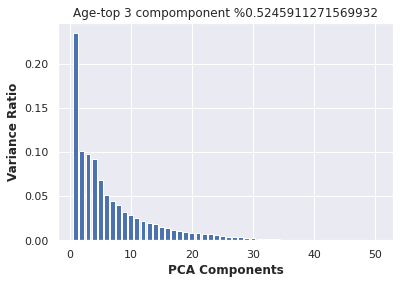

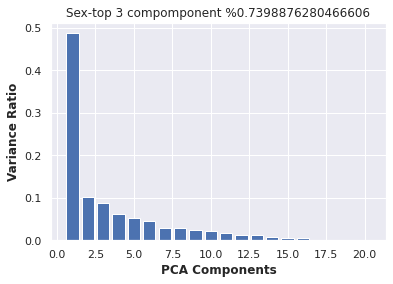

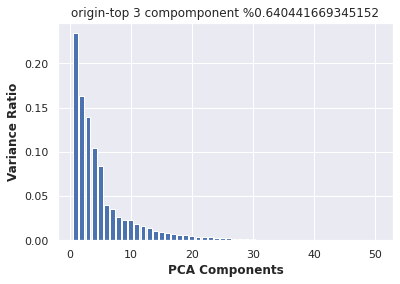

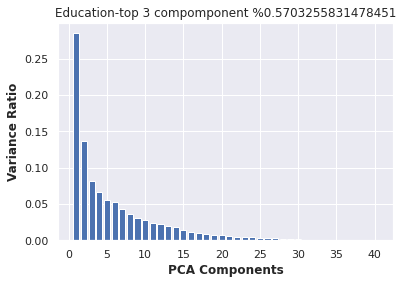

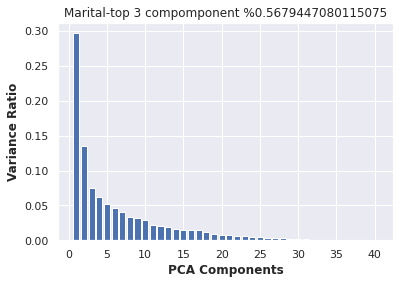

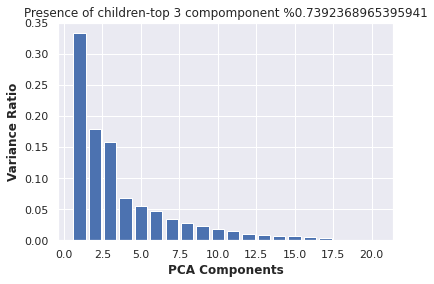

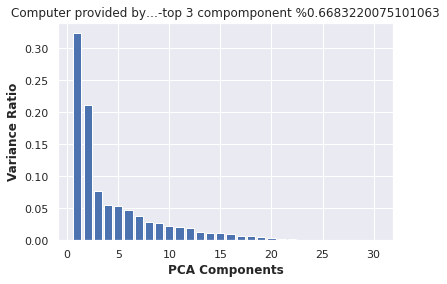

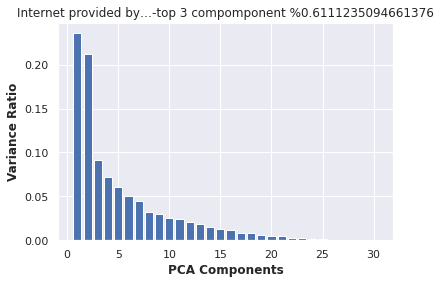

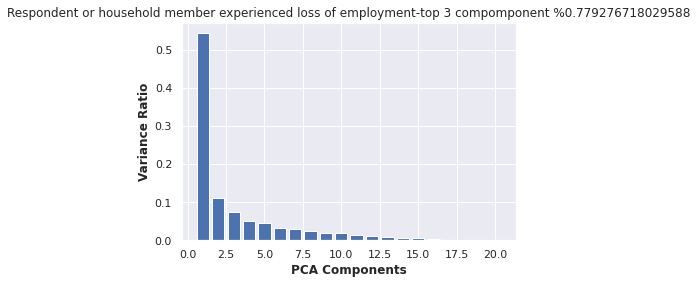

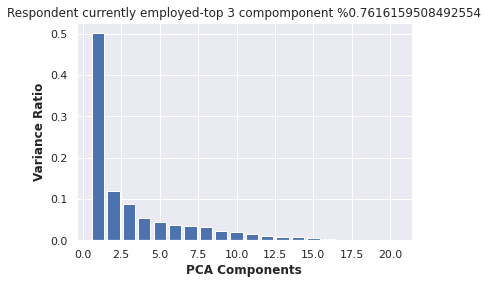

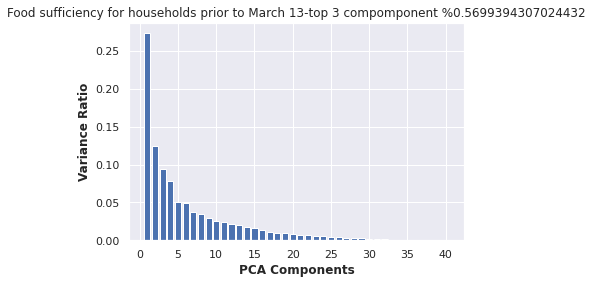

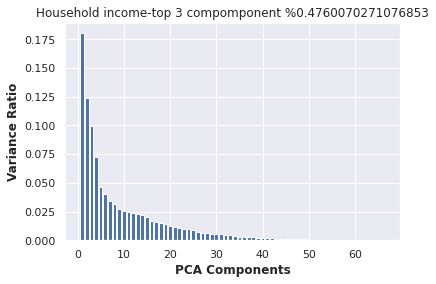

In [ ]:
pca={}
f_df_scaled = {}
for key,val in f_df.items():
  if key in charect:
    df = val
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    f_df_scaled[key] = df_scaled
    pca[key] = PCA(svd_solver='randomized', random_state=42)
    pca[key].fit(df_scaled)

    # Variance Ratio bar plot for each PCA components.
    plt.figure()
    ax = plt.bar(range(1,len(pca[key].explained_variance_ratio_)+1), pca[key].explained_variance_ratio_)
    plt.xlabel("PCA Components",fontweight = 'bold')
    plt.ylabel("Variance Ratio",fontweight = 'bold')
    plt.title(key+"-top 3 compomponent %"+str(np.cumsum(pca[key].explained_variance_ratio_)[3]))
    plt.show()

In [ ]:
# Checking which attributes are well explained by the pca components

pcs = {}
attributes_pca = {}
for key, val in f_df.items():
  df = val
  pcs[key] = {}
  for i in range(1,4):
    pcs[key]["PC_"+str(i)]= pca[key].components_[i]
  pcs[key]["Attribute"] = list(df.columns)
  attributes_pca[key] = pd.DataFrame(pcs[key])

In [ ]:
for key, val in f_df.items():
  df = val
  for i in range(1,4):
    attributes_pca[key]["PC_R_"+str(i)]= attributes_pca[key]["PC_"+str(i)].rank(pct=True)
attributes_pca["Age"].head()

PC_1   PC_2   PC_3  \
0 0.2945 0.3084 0.0695   
1 0.2915 0.3030 0.0626   
2 0.2613 0.3383 0.0132   
3 0.2905 0.3204 0.0537   
4 0.2739 0.3373 0.0189   

                                                                                                                         Attribute  \
0  Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes      
1  Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes     
2  Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes   
3  Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes      
4  Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes       

   PC_R_1  PC_R_2  PC_R_3  
0 1.0000  0.9400  0.7600   
1 0.9800  0.9200  0.7400   
2 0.9200  1.0000  0.5400   
3 0.9600  0.9600  0.7200   
4 0.9400  0.9800  0.6000

In [ ]:
imp_subchar = set()
for key, val in f_df.items():
  df = val
  print(key)
  for i in range(1,4):
    k1 = "PC_R_"+str(i)
    char_list = list(attributes_pca[key][attributes_pca[key][k1]>=0.95].Attribute)
    print("PCA",i,":",char_list)
    imp_subchar.update(char_list)
  print()

Age
PCA 1 : ['Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes', 'Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes', 'Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes']
PCA 2 : ['Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device sometimes available for educational purposes', 'Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes', 'Age_18 - 24 ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes']
PCA 3 : ['Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes', 'Age_18 - 24 ##FEATURE## Availability of Internet for educational pu

In [ ]:
len(imp_subchar)

88

In [ ]:
forecast_f = forecast.filter(list(imp_subchar), axis=1)

In [ ]:
df = forecast_f
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ratio')

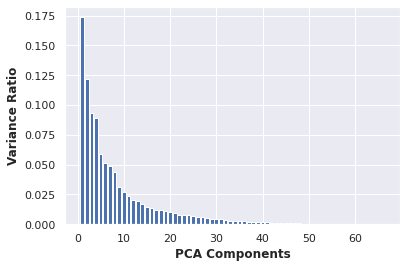

In [ ]:
# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

Text(0, 0.5, 'Cumulative Explained Variance')

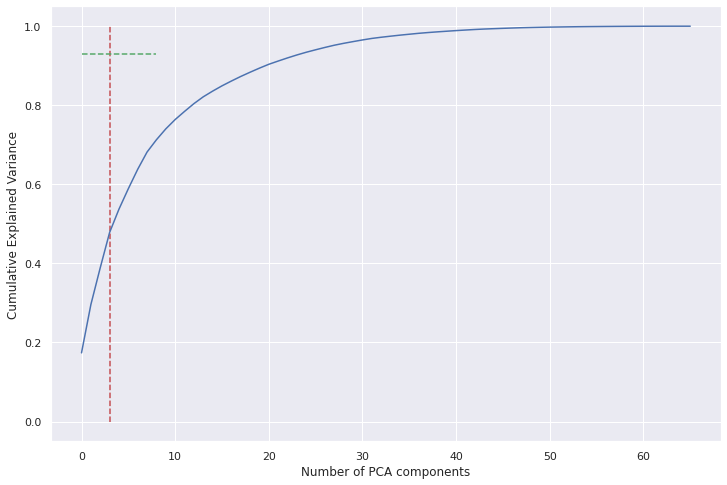

In [ ]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
org_col = list(df.columns)
Attributes_pca = pd.DataFrame({'Attribute':org_col,
                               'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})
Attributes_pca.head()

Attribute  \
0  Computer provided by… *_Some other source ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes                                             
1  Household income_Less than $25,000 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes                                                     
2  Education_High school or GED ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes                                                            
3  Food sufficiency for households prior to March 13, 2020_Often not enough to eat ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes   
4  Household income_$200,000 and above ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes                                                  

     PC_1    PC_2    PC_3  
0 -0.0759 0.1894  0.1042   
1 -0.1786 0.0515  -0.0458  
2 0.1322  -0.0084 0.1330   
3 0.0301  -0.0012 0.1921   
4 0.0608  0.2541  -0.0570

################################################


<Figure size 360x360 with 0 Axes>

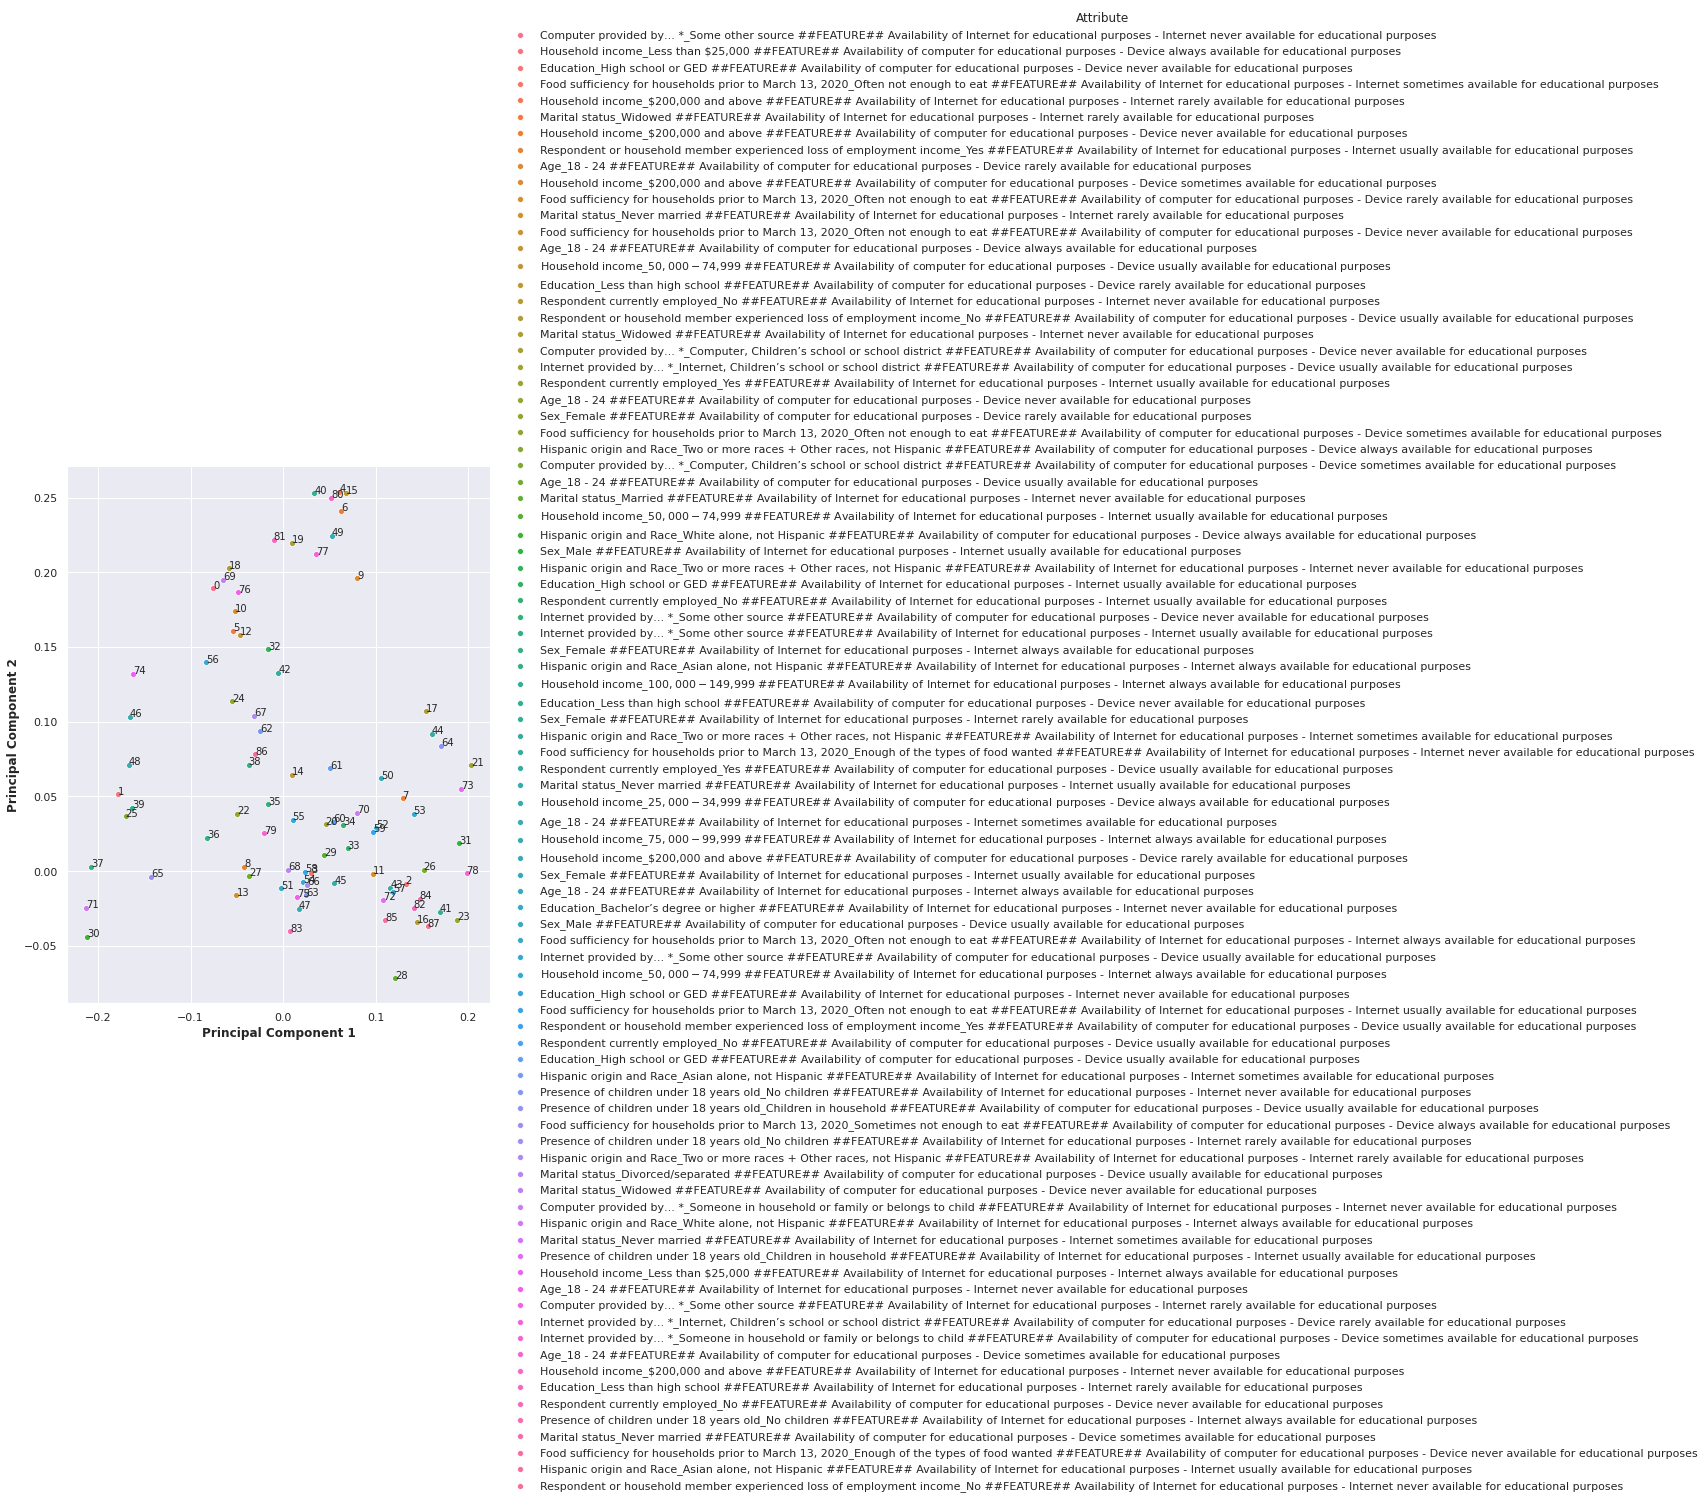

<Figure size 360x360 with 0 Axes>

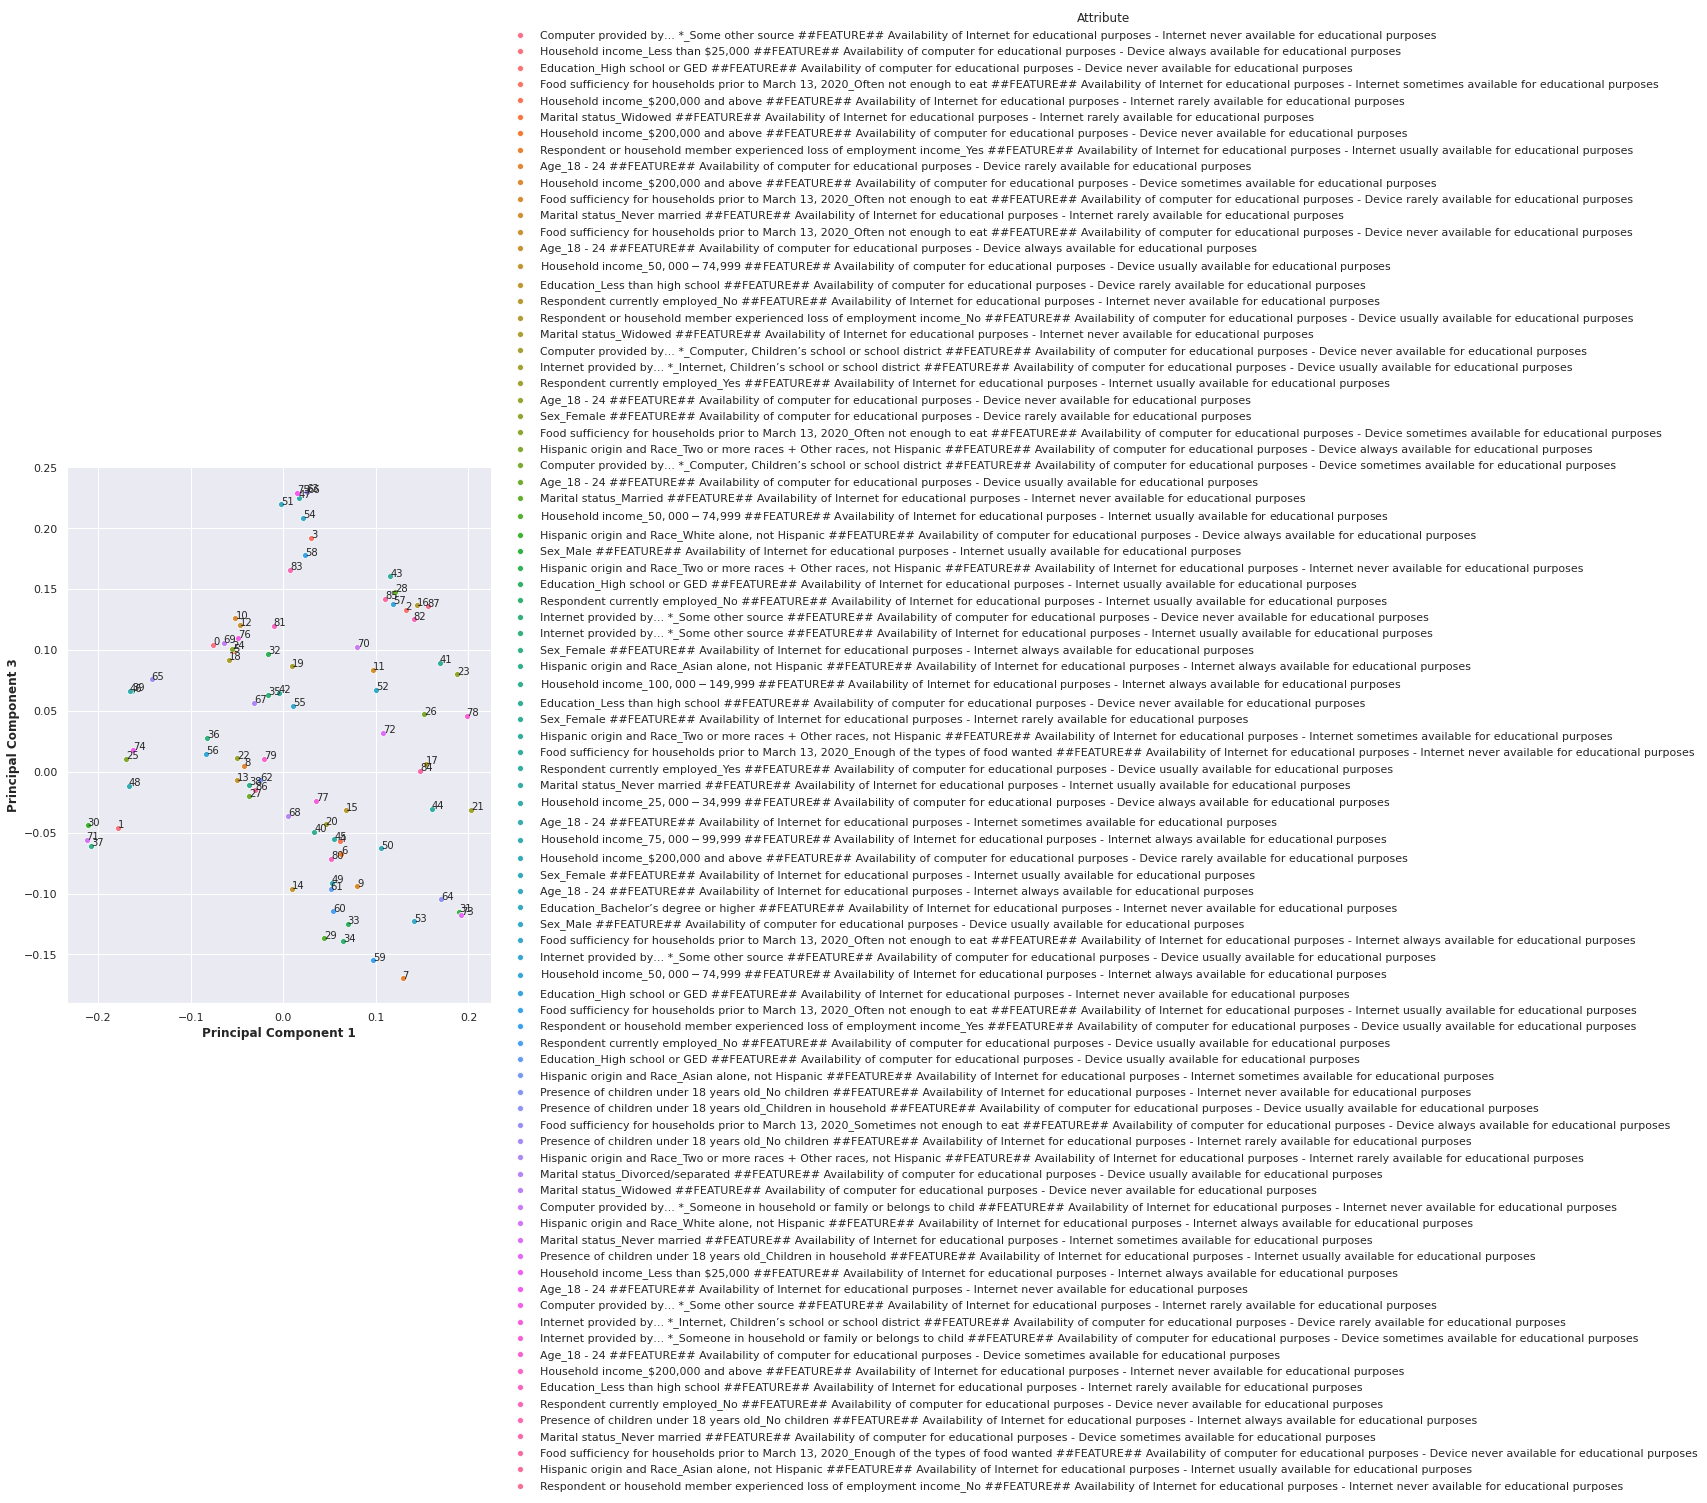

################################################


In [ ]:
print("################################################")
plt.figure(figsize=(5,5))
sns.pairplot(data=Attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')
for i,txt in enumerate(Attributes_pca.Attribute):
    plt.annotate(str(i), (Attributes_pca.PC_1[i],Attributes_pca.PC_2[i]))
plt.show()

plt.figure(figsize=(5,5))
sns.pairplot(data=Attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')
for i,txt in enumerate(Attributes_pca.Attribute):
    plt.annotate(str(i), (Attributes_pca.PC_1[i],Attributes_pca.PC_3[i]))
plt.show()
print("################################################")

In [ ]:
for i in range(1,4):
    Attributes_pca["PC_R_"+str(i)]= Attributes_pca["PC_"+str(i)].rank(pct=True)
Attributes_pca.head()

Attribute  \
0  Computer provided by… *_Some other source ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes                                             
1  Household income_Less than $25,000 ##FEATURE## Availability of computer for educational purposes - Device always available for educational purposes                                                     
2  Education_High school or GED ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes                                                            
3  Food sufficiency for households prior to March 13, 2020_Often not enough to eat ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes   
4  Household income_$200,000 and above ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes                                                  

     PC_1    PC_2    PC_3  PC_R_1  PC_R_2  PC_R_3  
0 -0.0759 0.1894  0.1042  0.1477  0.8636  0.7500   
1 -0.1786 0.0515  -0.0458 0.0455  0.5909  0.2614   
2 0.1322  -0.0084 0.1330  0.8295  0.2386  0.8295   
3 0.0301  -0.0012 0.1921  0.5227  0.3182  0.9318   
4 0.0608  0.2541  -0.0570 0.6364  1.0000  0.2159

In [ ]:
imp_feat = set()
for i in range(1,4):
  k1 = "PC_R_"+str(i)
  char_list = list(Attributes_pca[Attributes_pca[k1]>=0.90].Attribute)
  print("PCA",i,":",char_list)
  imp_feat.update(char_list)
print()

PCA 1 : ['Respondent currently employed_Yes ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes', 'Sex_Female ##FEATURE## Availability of computer for educational purposes - Device rarely available for educational purposes', 'Sex_Male ##FEATURE## Availability of Internet for educational purposes - Internet usually available for educational purposes', 'Sex_Female ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes', 'Respondent currently employed_Yes ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes', 'Presence of children under 18 years old_Children in household ##FEATURE## Availability of computer for educational purposes - Device usually available for educational purposes', 'Presence of children under 18 years old_Children in household ##FEATURE## Availability of Internet for educational purposes

In [ ]:
imp_feat

{'Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet always available for educational purposes',
 'Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet never available for educational purposes',
 'Age_18 - 24 ##FEATURE## Availability of Internet for educational purposes - Internet sometimes available for educational purposes',
 'Computer provided by… *_Computer, Children’s school or school district ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes',
 'Education_Less than high school ##FEATURE## Availability of Internet for educational purposes - Internet rarely available for educational purposes',
 'Education_Less than high school ##FEATURE## Availability of computer for educational purposes - Device never available for educational purposes',
 'Education_Less than high school ##FEATURE## Availability of computer for educational purposes - Device rarely availab

In [ ]:
 # Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

In [ ]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(df_scaled)

In [ ]:
# Creating new dataframe with Principal components
column = []
for i in range(1,4):
  column.append("PC_"+str(i))
df_pca = pd.DataFrame(df_inc_pca, columns=column)
locs = pd.DataFrame(list(df.index),columns = ["Location"])
df_pca_final = pd.concat([locs, df_pca], axis=1)
df_pca_final.head()

Location    PC_1    PC_2    PC_3
0  AK                 -3.8391 3.6525  6.3808 
1  AL                 -3.3244 -0.5101 0.6387 
2  AR                 -7.4517 -0.5194 0.9819 
3  AZ                 -2.8198 -0.3983 -1.0458
4  Atlanta_Metro_Area 1.6815  -1.5894 -1.8460

(3.5, -0.5)

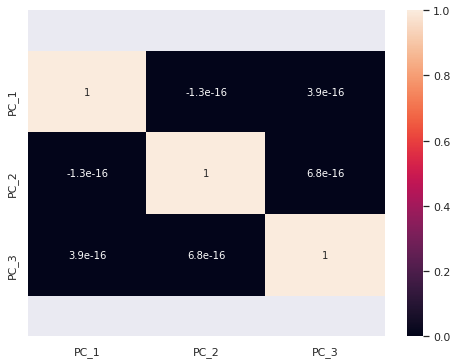

In [ ]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(df_pca_final.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

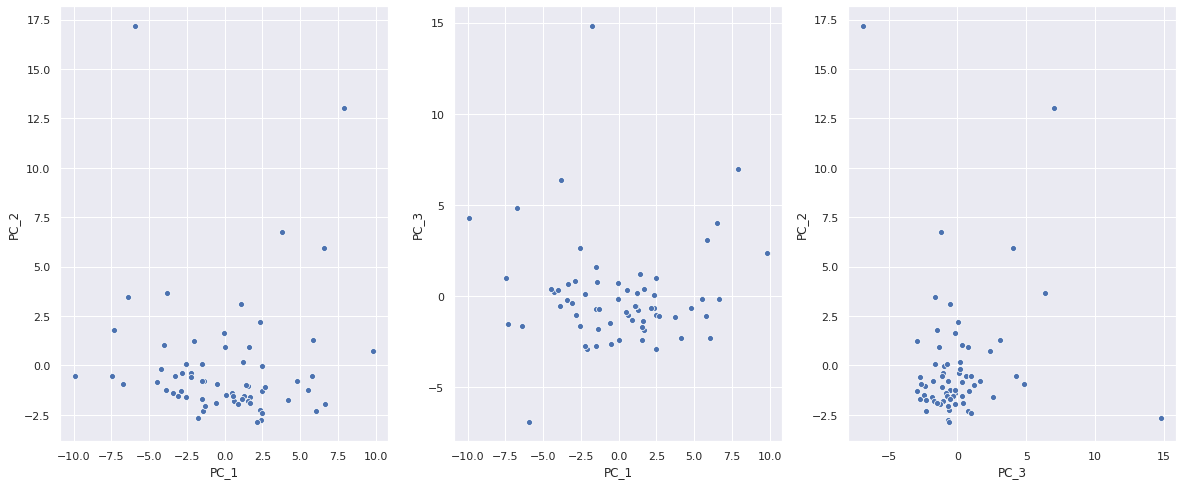

In [ ]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')

In [ ]:
# Reindexing the df 
df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['Location'],axis=1)
df_pca_final.head()

Location    PC_1    PC_2    PC_3
0  AK                 -3.8391 3.6525  6.3808 
1  AL                 -3.3244 -0.5101 0.6387 
2  AR                 -7.4517 -0.5194 0.9819 
3  AZ                 -2.8198 -0.3983 -1.0458
4  Atlanta_Metro_Area 1.6815  -1.5894 -1.8460

In [ ]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS


In [ ]:
hopkins(df_pca_final_data)

0.8572677252456459

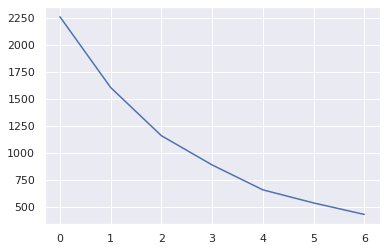

In [ ]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [ ]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3378061881379589
For n_clusters=3, the silhouette score is 0.35818787791054074
For n_clusters=4, the silhouette score is 0.37148136476636756
For n_clusters=5, the silhouette score is 0.3646905362772275
For n_clusters=6, the silhouette score is 0.3411546128283452
For n_clusters=7, the silhouette score is 0.32947190185167147
For n_clusters=8, the silhouette score is 0.3187008751199733


In [ ]:
#K-means with k=4 clusters

cluster5 = KMeans(n_clusters=5, max_iter=50, random_state= 100)
cluster5.fit(df_pca_final_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
# Cluster labels

cluster5.labels_

array([2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 4, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 1, 4, 0, 4, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 4, 0, 0, 1, 1, 1, 0, 0, 1, 1, 4, 1, 0, 0, 3, 1],
      dtype=int32)

In [ ]:
# Assign the label

df_pca_final['Cluster_Id5'] = cluster5.labels_
df_pca_final

Location    PC_1    PC_2    PC_3  Cluster_Id5
0   AK                       -3.8391 3.6525  6.3808   2          
1   AL                       -3.3244 -0.5101 0.6387   0          
2   AR                       -7.4517 -0.5194 0.9819   0          
3   AZ                       -2.8198 -0.3983 -1.0458  0          
4   Atlanta_Metro_Area       1.6815  -1.5894 -1.8460  1          
..                 ...          ...      ...     ... ..          
61  WA                       0.5477  -1.5582 0.3510   1          
62  WI                       -2.2292 -0.5989 -2.7529  0          
63  WV                       -7.2998 1.8043  -1.5070  0          
64  WY                       -5.9431 17.1640 -6.8779  3          
65  Washington.DC_Metro_Area 6.0723  -2.3149 -2.2708  1          

[66 rows x 5 columns]

In [ ]:
# Number of countries in each cluster

df_pca_final['Cluster_Id5'].value_counts()

1    33
0    23
4    5 
2    4 
3    1 
Name: Cluster_Id5, dtype: int64

In [ ]:
c_0 = df_pca_final[df_pca_final['Cluster_Id5']==0]['Location']

In [ ]:
c_1 = df_pca_final[df_pca_final['Cluster_Id5']==1]['Location']

In [ ]:
c_2 = df_pca_final[df_pca_final['Cluster_Id5']==2]['Location']

In [ ]:
c_3 = df_pca_final[df_pca_final['Cluster_Id5']==3]['Location']

In [ ]:
set(c_0)

{'AL',
 'AR',
 'AZ',
 'CA',
 'Detroit_Metro_Area',
 'HI',
 'Houston_Metro_Area',
 'IL',
 'IN',
 'KS',
 'KY',
 'MI',
 'MT',
 'NE',
 'NM',
 'OK',
 'Phoenix_Metro_Area',
 'Riverside_Metro_Area',
 'SC',
 'TN',
 'TX',
 'WI',
 'WV'}

In [ ]:
c_1

4     Atlanta_Metro_Area      
5     Boston_Metro_Area       
7     CO                      
8     CT                      
9     Chicago_Metro_Area      
11    DE                      
12    Dallas_Metro_Area       
14    FL                      
15    GA                      
18    IA                      
19    ID                      
25    Los.Angeles_Metro_Area  
26    MA                      
27    MD                      
28    ME                      
30    MN                      
34    Miami_Metro_Area        
35    NC                      
39    NJ                      
41    NV                      
42    NY                      
43    New.York_Metro_Area     
44    OH                      
46    OR                      
47    PA                      
48    Philadelphia_Metro_Area 
53    SD                      
54    San.Francisco_Metro_Area
55    Seattle_Metro_Area      
58    UT                      
59    VA                      
61    WA                      
65    Wa

In [ ]:
c_2

0     AK
24    LA
31    MO
32    MS
Name: Location, dtype: object

In [ ]:
c_3

64    WY
Name: Location, dtype: object

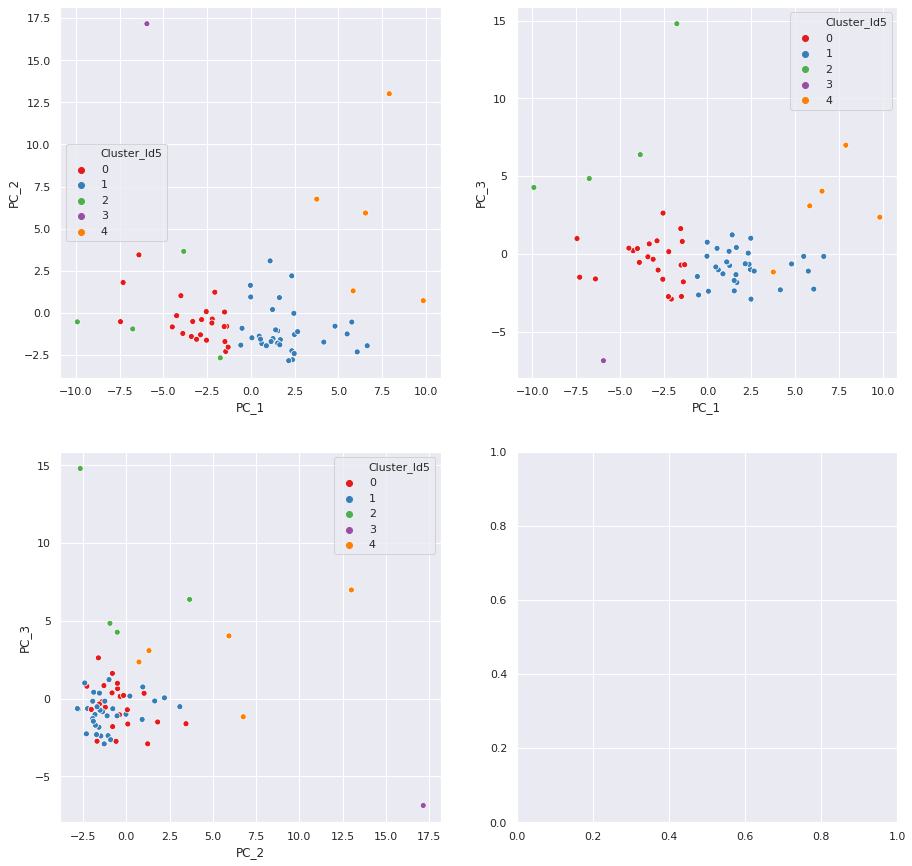

In [ ]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,15))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id5',legend='full',palette="Set1",data=df_pca_final,ax=axes[0][0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id5',legend='full',palette="Set1",data=df_pca_final,ax=axes[0][1])
sns.scatterplot(x='PC_2',y='PC_3',hue='Cluster_Id5',legend='full',palette="Set1",data=df_pca_final,ax=axes[1][0])

In [ ]:
t1 = {'AL',
 'AR',
 'AZ',
 'CA',
 'Detroit_Metro_Area',
 'HI',
 'Houston_Metro_Area',
 'IL',
 'IN',
 'KS',
 'KY',
 'MI',
 'MT',
 'NE',
 'NM',
 'OK',
 'Phoenix_Metro_Area',
 'Riverside_Metro_Area',
 'SC',
 'TN',
 'TX',
 'WI',
 'WV','AK', 'LA', 'MO', 'MS', 'WY'}

t2 = {'AL',
 'AK',
 'AZ',
 'AR',
 'DE',
 'HI',
 'KS',
 'LA',
 'ME',
 'MT',
 'NE',
 'NH',
 'ND',
 'OK',
 'SD',
 'WV',
 'WY',
 'Phoenix_Metro_Area',
 'Detroit_Metro_Area'}

In [ ]:
t1.difference(t2)

{'CA',
 'Houston_Metro_Area',
 'IL',
 'IN',
 'KY',
 'MI',
 'MO',
 'MS',
 'NM',
 'Riverside_Metro_Area',
 'SC',
 'TN',
 'TX',
 'WI'}

In [ ]:
t2.difference(t1)

{'DE', 'ME', 'ND', 'NH', 'SD'}